<h1 style="font-size: 40px; margin-bottom: 0px;">Week <s>1</s> 2 Assignment</h1>

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h1 style="color:#FF0000;"><strong><u>KEY</u></strong></h1>

<strong><u>Due: Saturday, September 13 at 11:59PM</u></strong>

<strong><u>Total points: 5 pts</u></strong>

<strong><u>To turn in your assignment:</u></strong>
<ol>
    <li>Complete assignment and make sure you have all the outputs requested for the notebook</li>
    <li>Go to your server's file directory and locate the <code>week_2_homework</code> directory containing all your outputs from this assignment including this notebook</li>
    <li>Right click and select <strong>Download as an Archive</strong> to download the <code>week_2_homework</code> directory as a ZIP folder. Do not mix up with <strong>Download Current Folder as an Archive</strong></li>
    <li>Upload your ZIP folder to your individual feedback Google Drive folder under <code>MCB201B</code></li>
</ol>

<strong><u>How this assignment will be graded:</u></strong>

You will be graded on whether or not you have <u>all requested outputs and files</u> and if your output is correct. You will also be graded on if your code is expected to be able to run without errors. There can be more than one correct way to answer a question. If you find that you prefer to separate your answer for a single question into multiple code cells, feel free to do so.
<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

In [1]:
#Don't forget to import any needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<h2>Question 1</h2>

0.5pt

Import the <code>cell_counts_data.csv</code> file located in the <code>week_2_homework</code> directory. Run an appropriate statistical test on the dataset. Output the p-value.

In [2]:
cell_counts = pd.read_csv('cell_counts_data.csv')

In [18]:
t_results = stats.ttest_ind(cell_counts['control'],
                            cell_counts['tazko'],
                            nan_policy='omit'
                           )

t_results.pvalue

np.float64(3.798677055495083e-36)

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 2</h2>

1pt

Visualize the data from question 1 as a bar plot with individual samples overlaid as dots. Include in your visualization the following components as well:

<ol>
    <li>Error bars denoting the standard error of the mean</li>
    <li>Y-axis label set as Cell Counts</li>
    <li>X-axis tick marks</li>
    <li>Brackets with significance to denote results of statistical analysis</li>
    <li>Adjust <code>zorder</code> parameter so that error bars are on top of dots and bar itself is on bottom</li>
</ol>

Export the plot as a PDF into the <code>week_2_homework</code> directory and include it in your homework submission.

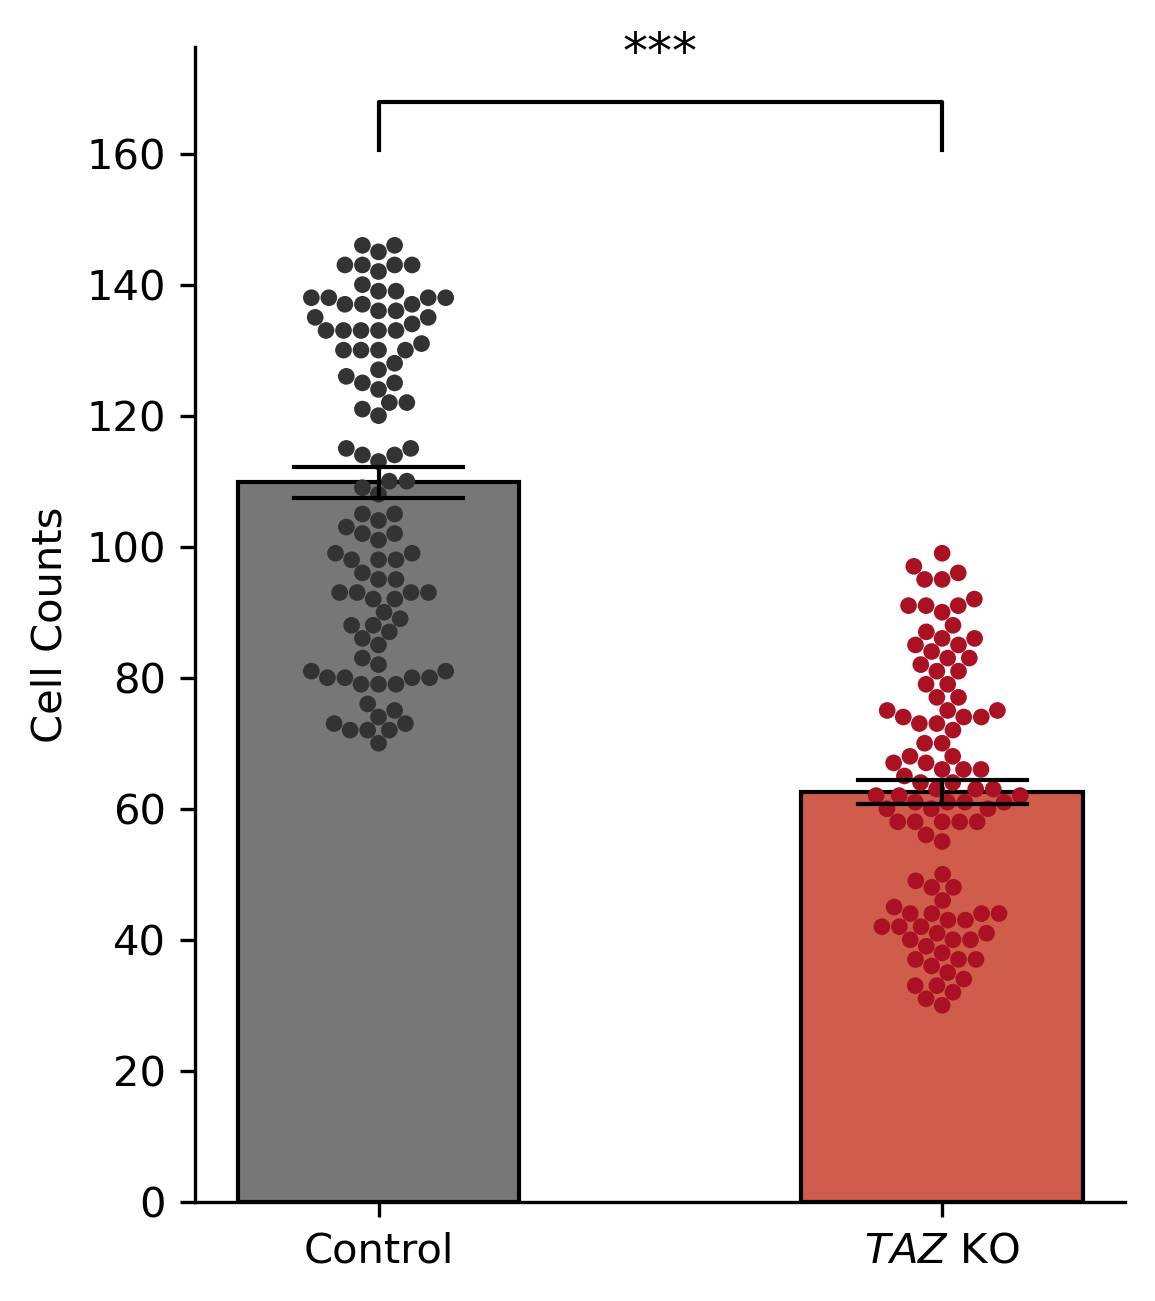

In [4]:
fig, ax = plt.subplots()

sns.barplot(data=cell_counts,
            estimator=np.mean,
            errorbar='se',
            width=0.5,
            capsize=.3,
            err_kws={'linewidth': 1,
                     'color': 'black',
                     'zorder': 99
                    },
            edgecolor='k',
            palette=['#777777', '#E64B35']
           )

sns.swarmplot(data=cell_counts,
              palette=['#333333', '#AA1122'],
              s=4,
             )

x1, x2 = 0, 1
y_max = cell_counts.max().max()
adjustment = y_max*0.1
h = adjustment * 0.5
y = y_max + adjustment

plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')

if t_results.pvalue < 0.0005:
    pvalue_text = '***'
elif t_results.pvalue < 0.005:
    pvalue_text = '**'
elif t_results.pvalue < 0.05:
    pvalue_text = '*'
else:
    pvalue_text = 'ns'

plt.text((x1+x2)*0.5, y+(h*1.5), pvalue_text, ha='center', va='bottom', color='k', size=12)

ax.set_ylabel('Cell Counts')
ax.set_xticks([0,1],
              ['Control', '$TAZ$ KO'],
             )

fig.set_size_inches(4,5)
fig.set_dpi(300)
sns.despine()
plt.show()

fig.savefig('question_1.pdf', bbox_inches='tight')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 3</h2>

1pt

Take a look at the documentation for either:

<ul>
    <li><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html" rel="noopener noreferrer"><u><code>plt.hist()</code> documentation</u></a></li>
        <li><a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" rel="noopener noreferrer"><u><code>sns.histplot()</code> documentation</u></a></li>
</ul>

Choose one of the functions to plot a histogram of the distribution of cell counts, with <code>'control'</code> in one color and <code>'tazko'</code> in another color. 

Set up the histogram so that there are 20 bins, spanning 0 to 160.

Export your histogram as a PDF and include it in your homework submission. Include a legend and position it to the right of the plot.

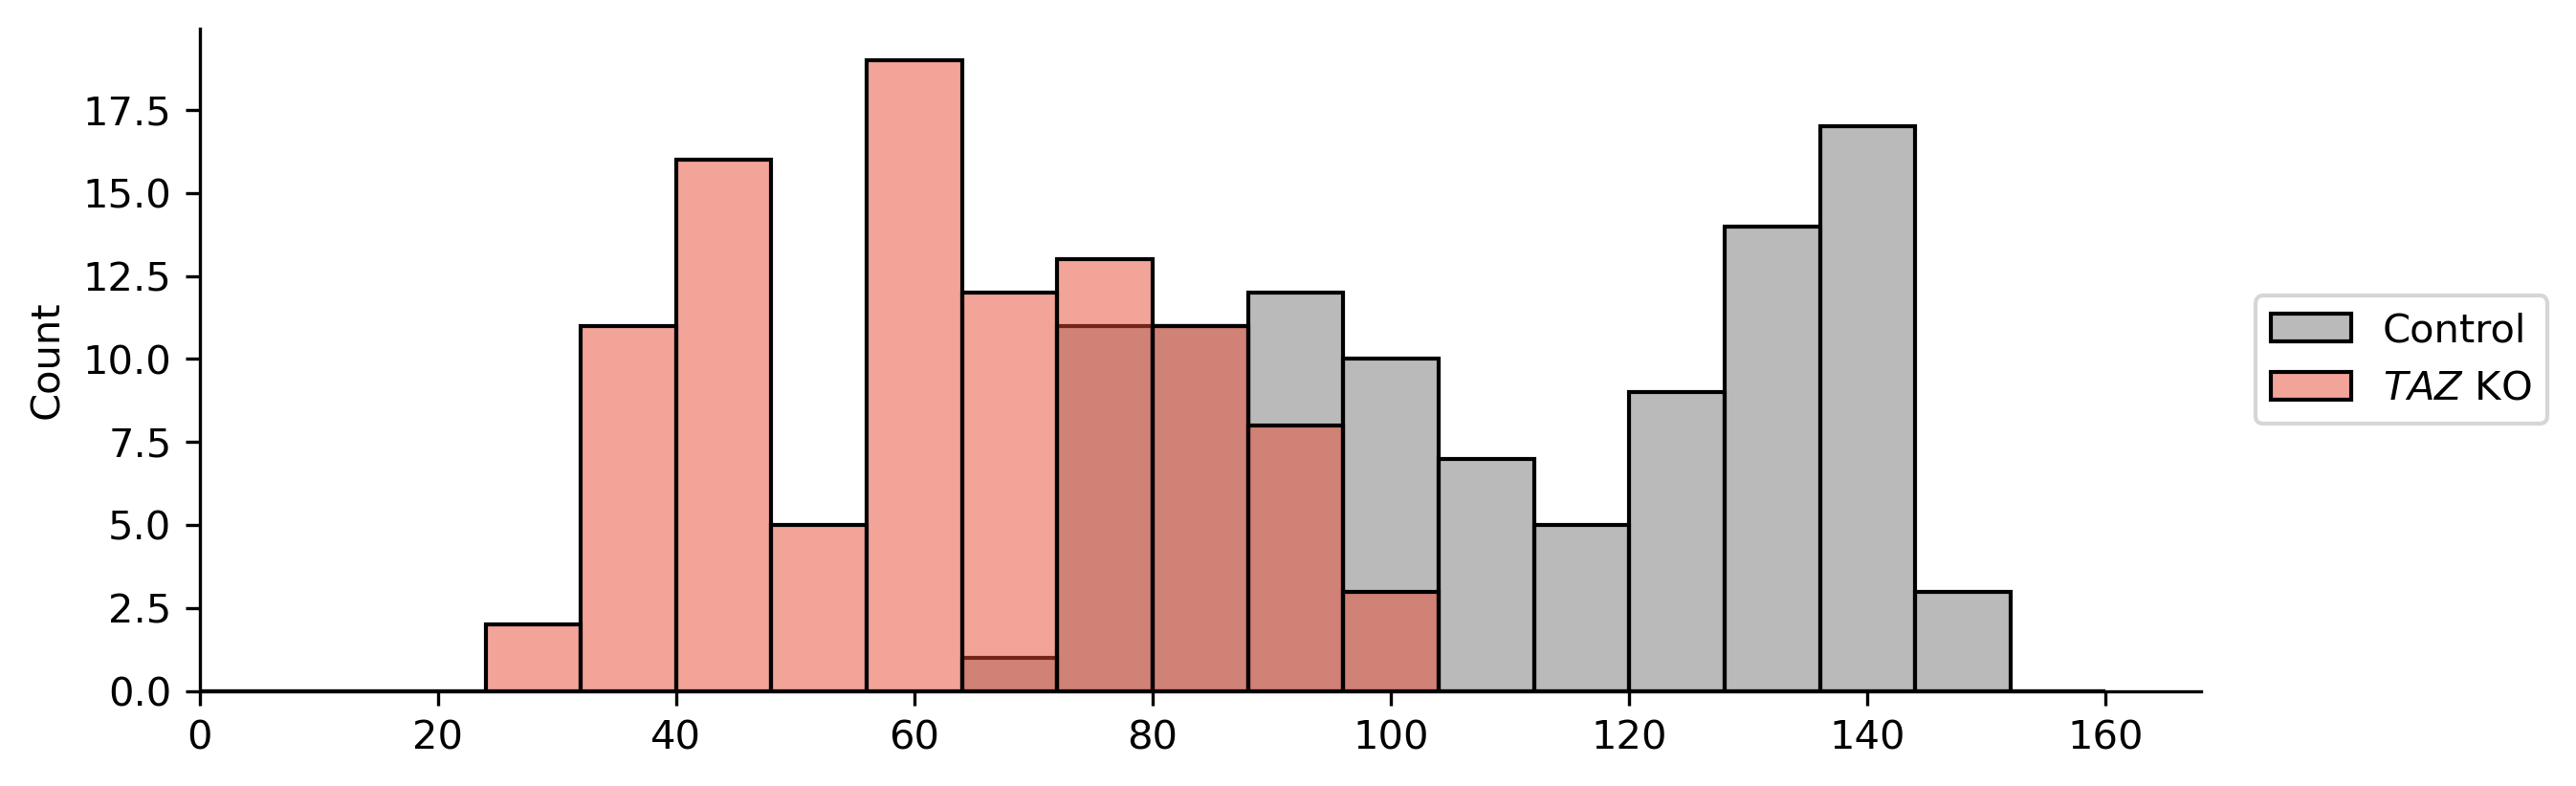

In [5]:
fig, ax = plt.subplots()

sns.histplot(data=cell_counts['control'],
             bins=20,
             binrange=[0,160],
             label='Control',
             color='#777777',
             alpha=0.5
            )

sns.histplot(data=cell_counts['tazko'],
             bins=20,
             binrange=[0,160],
             label='$TAZ$ KO',
             color='#E64B35',
             alpha=0.5
            )

ax.legend(loc='center',
          bbox_to_anchor=(1.1, 0.5)
         )

ax.set_xlabel(None)
plt.xlim(0)

fig.set_size_inches(9, 3)
fig.set_dpi(300)

sns.despine()
plt.show()

fig.savefig('question_3.pdf', bbox_inches='tight')

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 4</h2>

0.5pts

Import our class Western blot data for TAZ edited cells from the file <code>western_data.csv</code>. 

Output the following into this notebook:

<ul>
    <li>means for <code>'control'</code> and <code>'tazko</code></li>
    <li>standard error of the mean for <code>'control'</code> and <code>'tazko'</code></li>
    <li>the p-value of an appropriate statistical test to evaluate if there is a significant change in TAZ expression in edited cells</li>
</ul>

In [6]:
western = pd.read_csv('western_data.csv')

In [7]:
western.mean()

control    1.669272
tazko      0.330728
dtype: float64

In [8]:
western.sem()

control    0.600942
tazko      0.196643
dtype: float64

In [15]:
western_result = stats.ttest_ind(western['control'],
                                 western['tazko'],
                                 equal_var=False,
                                )

western_result.pvalue

np.float64(0.07058383176363665)

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 5</h2>

0.5pts

Import our class scratch assay dataset <code>scratch_assay_data_long_form.csv</code> into this notebook. Run the appropriate statistical tests to determine if there is a significant difference in cell migration between control cells and TAZ KO cells at 24 hours post-scratch and at 48 hours post-scratch.

Hint: This question will need you to recall how to filter DataFrames.

Output the p-values into this notebook.

In [10]:
scratch = pd.read_csv('scratch_assay_data_long_form.csv')

In [11]:
h24_result = stats.ttest_ind(scratch.loc[scratch['timepoint'] == 24, 'control'],
                             scratch.loc[scratch['timepoint'] == 24, 'tazko'],
                             equal_var=False
                            )
h24_result.pvalue

np.float64(0.16314377253915727)

In [12]:
h48_result = stats.ttest_ind(scratch.loc[scratch['timepoint'] == 48, 'control'],
                             scratch.loc[scratch['timepoint'] == 48, 'tazko'],
                             equal_var=False
                            )
h48_result.pvalue

np.float64(0.3151914215123033)

<hr style="margin-left: 0px; border: 0.25px solid; border-color: #000000; width: 600px;"></hr>

<h2>Question 6</h2>

1.5pts

Using our class scratch assay data sets, plot a line plot corresponding to the means of each condition at each timepoint with error bands denoting the standard error of the mean. <u>OPTIONAL:</u> If you want, you can plot annotations on the plot to include the results of your statistical analyses from question 5.

Hints to help:
<ul>
    <li><a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html" rel="noopener noreferrer"><u>Look over the documentation for <code>sns.lineplot()</code></u></a> to help with plotting the line plot with error bands.</li>
    <li><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html" rel="noopener noreferrer"><u>Look over the documentation for <code>plt.plot()</code></u></a> to help with plotting annotation lines. See what argument you can pass to the <code>marker</code> parameter to make plotting your annotation easier.</li>
</ul>

Export your plot as PDF to include with your homework submission.

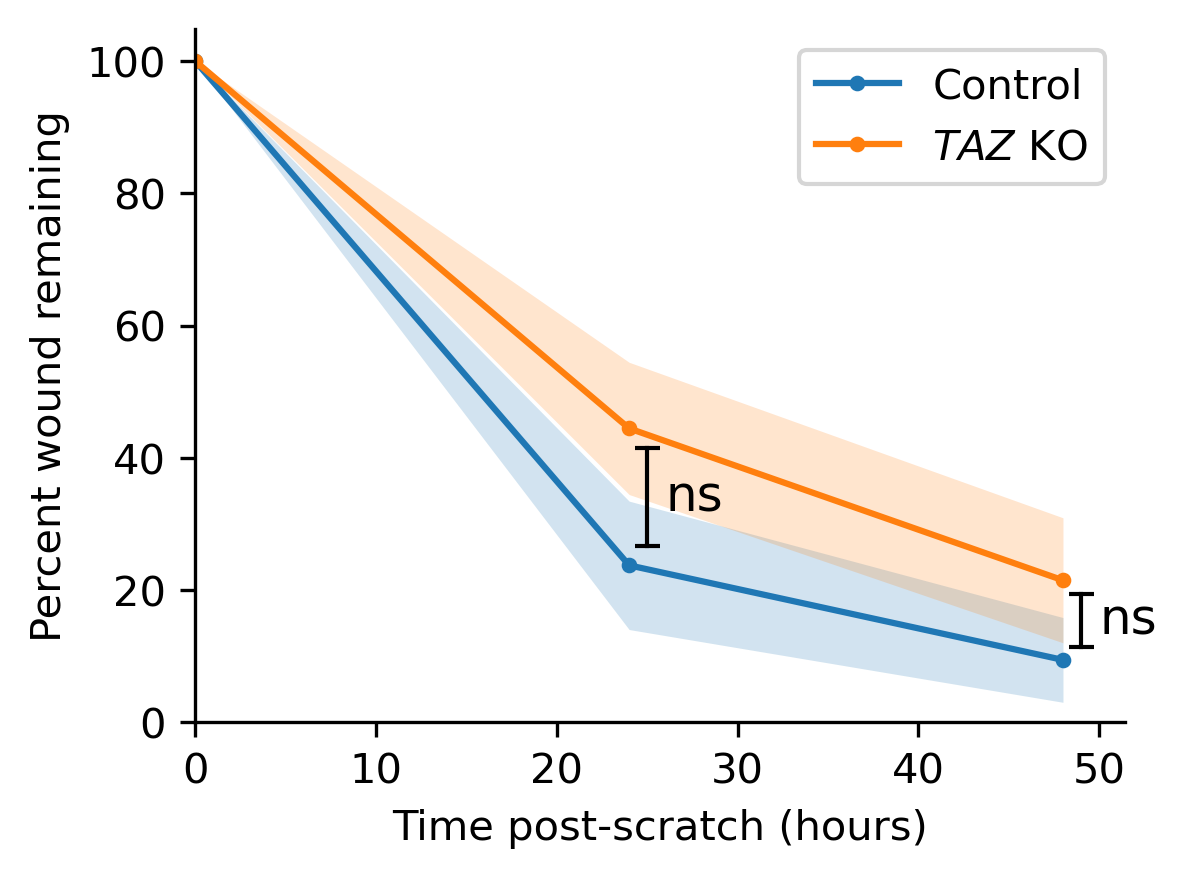

In [16]:
fig, ax = plt.subplots()

sns.lineplot(data=scratch,
             x='timepoint',
             y='control',
             estimator = np.mean,
             errorbar='se',
             err_kws={'lw': 0},
             marker='.',
             markeredgecolor=None,
             label='Control'
            )

sns.lineplot(data=scratch,
             x='timepoint',
             y='tazko',
             estimator = np.mean,
             errorbar='se',
             err_kws={'lw': 0},
             marker='.',
             markeredgecolor=None,
             label='$TAZ$ KO'
            )

y24_ctrl_adj = np.mean(scratch.loc[scratch['timepoint'] == 24, 'control']) + 3
y24_tazko_adj = np.mean(scratch.loc[scratch['timepoint'] == 24, 'tazko']) - 3

y48_ctrl_adj = np.mean(scratch.loc[scratch['timepoint'] == 48, 'control']) + 2
y48_tazko_adj = np.mean(scratch.loc[scratch['timepoint'] == 48, 'tazko']) - 2

plt.plot([25, 25],
         [y24_ctrl_adj, y24_tazko_adj],
        lw=1, c='k', marker='_'
       )

plt.plot([49, 49],
         [y48_ctrl_adj, y48_tazko_adj],
        lw=1, c='k', marker='_'
       )

plt.text(26, (y24_tazko_adj + y24_ctrl_adj) / 2, 'ns', ha='left', va='center', color='k', size=12)
plt.text(50, (y48_tazko_adj + y48_ctrl_adj) / 2, 'ns', ha='left', va='center', color='k', size=12)


ax.set_ylabel('Percent wound remaining')
ax.set_xlabel('Time post-scratch (hours)')

plt.ylim(0)
plt.xlim(0)

fig.set_size_inches(4,3)
fig.set_dpi(300)
sns.despine()
plt.show()

fig.savefig('question_6.pdf', bbox_inches='tight')